In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_csv(r'cancer.csv')
data.drop_duplicates(inplace=True)

pandas.core.frame.DataFrame

In [4]:
# 良性恶性肿瘤类别获取区分
t0 = data[data["type"]==0]
t1 = data[data["type"]==1]

# # 类别数据进行随机打乱  random_state可使随机重现
# t0 = t0.sample(len(t0),random_state=0)
# t1 = t1.sample(len(t1),random_state=0)

# 测试集与训练集长度
train_len0 = int(len(t0) * 0.8 )
test_len0 = len(t0) - train_len0
train_len1 = int(len(t1) * 0.8 )
test_len1 = len(t1) - train_len1

#构造训练集与测试集
train_X = pd.concat([t0.iloc[:train_len0,:-1],t1.iloc[:train_len1,:-1]],axis=0)
train_y = pd.concat([t0.iloc[:train_len0,-1],t1.iloc[:train_len1,-1]],axis=0)
test_X = pd.concat([t0.iloc[test_len0:,:-1],t1.iloc[:test_len1,:-1]],axis=0)
test_y = pd.concat([t0.iloc[test_len0:,-1],t1.iloc[:test_len1,-1]],axis=0)

# 随机打乱训练集与测试集的顺序
train_X = train_X.sample(len(train_X),random_state=0)
train_y = train_y.sample(len(train_y),random_state=0)
test_X = test_X.sample(len(test_X),random_state=0)
test_y = test_y.sample(len(test_y),random_state=0)
train_X = np.asarray(train_X)
train_y = np.asarray(train_y)
test_X = np.asarray(test_X)
test_y = np.asarray(test_y)

In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.preprocessing import MinMaxScaler 

In [6]:
#对数据集进行处理
feature=train_X
label=train_y.reshape([-1,1]) 
#将训练数据集中连续形的值标准化到(0,1)之间
minmxx=MinMaxScaler([0,1]) 
minmxx.fit(feature) 
feature=minmxx.transform(feature)
#将测试数据集中连续值标准化到(0,1)之间
minmxx.fit(test_X)
test_X=minmxx.transform(test_X)


In [43]:
#权重初始化
w=tf.Variable(tf.random_normal([30,1])) 
b=tf.Variable(tf.zeros([1,1])) 
x = tf.placeholder(tf.float32,[None,30])
y = tf.placeholder(tf.float32,[None,1])
ye=tf.matmul(x,w)+b 
pre=tf.sigmoid(ye) 
#设置损失函数跟优化方法
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=pre)) 
#可以修改学习率，这里设置的是0.01
train=tf.train.AdamOptimizer(0.01).minimize(loss) 
init=tf.global_variables_initializer() 
sess=tf.Session() 
sess.run(init) 
  #设置叠迭次数
for step in range(200):     
    sess.run(train,feed_dict={x:feature,y:label})     
    if step%10==0:         
        print(sess.run([loss],feed_dict={x:feature,y:label}))
#用模型对测试数据进行测试
pred=sess.run(pre,feed_dict={x:test_X}) 

from sklearn import metrics 
#输出测试相关的结果
# print(metrics.classification_report(test_y.reshape([-1,1]),pred.round()))
print(metrics.classification_report(test_y,pred.round()))

[0.7185947]
[0.7001706]
[0.67923254]
[0.6632279]
[0.6524601]
[0.6415919]
[0.6298539]
[0.61859363]
[0.60810006]
[0.5985702]
[0.59022087]
[0.5829717]
[0.57668394]
[0.57119846]
[0.56637883]
[0.56210977]
[0.5582987]
[0.55487096]
[0.5517671]
[0.54893917]
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       169
          1       0.84      0.89      0.86        72

avg / total       0.92      0.92      0.92       241



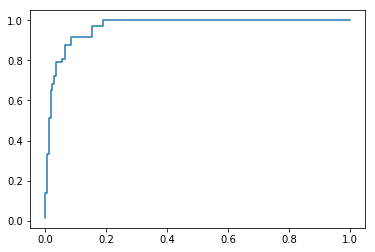

In [37]:
from sklearn.metrics import roc_curve
fprs,tprs,thresholds = roc_curve(test_y,pred)
import matplotlib.pyplot as plt
plt.plot(fprs,tprs)
plt.show()

In [32]:
pred[0]

array([0.37885243], dtype=float32)